In [0]:
import pandas as pd
from collections import deque
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, CuDNNLSTM
from sklearn import preprocessing

In [4]:
from google.colab import files
uploaded = files.upload()

Saving seriesSS.csv to seriesSS.csv
Saving XPS.csv to XPS.csv


In [0]:
import io
XPS = pd.read_csv(io.BytesIO(uploaded['XPS.csv']))
seriesSS = pd.read_csv(io.BytesIO(uploaded['seriesSS.csv']))

In [0]:
# frame a sequence as a supervised learning problem
def timeseries_to_supervised(data, lag=9):
    df = pd.DataFrame(data)
    columns = [df.shift(i) for i in range(0, lag+1)]
    columns.append(df)
    df = pd.concat(columns, axis=1)
    df.fillna(0, inplace=True)
    df = df.iloc[lag:,:(lag+1)]
    df = df.reset_index()
    df = df.drop(['index'], axis=1)
    return df

In [0]:
from scipy import signal

detrended = seriesSS - signal.detrend(seriesSS)

In [0]:
def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back+1):
    a = dataset[i:(i+look_back-3), :]
    dataX.append(a)
    dataY.append(dataset[i + look_back - 1, :])
  return np.array(dataX), np.array(dataY)

In [0]:
X,Y = create_dataset(XPS.values, 9)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test,  Y_train, Y_test = train_test_split(X,Y)

In [2]:
model = Sequential()
model.add(CuDNNLSTM(32, batch_input_shape=(1, X_train.shape[1], X_train.shape[2]), stateful=True))
model.add(Dense(32))
model.add(Dense(32))
model.add(Dense(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adadelta', metrics=['mse','mae'])

NameError: name 'sequential' is not defined

In [12]:
model.fit(X_train, Y_train, epochs=1000, batch_size=1, verbose=1, shuffle=False)

Instructions for updating:
Use tf.cast instead.
Epoch 1/1000
338/338 [==============================] - 5s 15ms/sample - loss: 17.5047 - mean_squared_error: 17.5047 - mean_absolute_error: 2.0281
Epoch 2/1000
338/338 [==============================] - 2s 5ms/sample - loss: 2.1537 - mean_squared_error: 2.1537 - mean_absolute_error: 1.1191
Epoch 3/1000
338/338 [==============================] - 2s 5ms/sample - loss: 1.6964 - mean_squared_error: 1.6964 - mean_absolute_error: 1.0190
Epoch 4/1000
338/338 [==============================] - 2s 5ms/sample - loss: 1.4037 - mean_squared_error: 1.4037 - mean_absolute_error: 0.9276
Epoch 5/1000
338/338 [==============================] - 2s 5ms/sample - loss: 1.0081 - mean_squared_error: 1.0081 - mean_absolute_error: 0.8100
Epoch 6/1000
338/338 [==============================] - 2s 5ms/sample - loss: 0.9033 - mean_squared_error: 0.9033 - mean_absolute_error: 0.7825
Epoch 7/1000
338/338 [==============================] - 2s 5ms/sample - loss: 0.8544 

KeyboardInterrupt: ignored

In [13]:
scores = model.evaluate(X_test, Y_test, verbose=2)
x="accuracy"
print("%s: %.2f%%" % (x, (100-scores[1]*100)))

 - 0s - loss: 0.1213 - mean_squared_error: 0.1213 - mean_absolute_error: 0.2784
accuracy: 87.87%


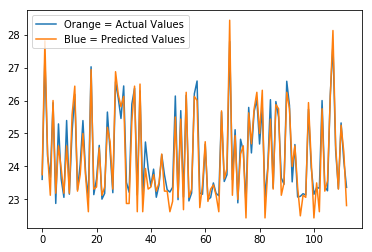

In [19]:
plt.plot(model.predict(X_test))
plt.plot(Y_test)
labels_legend = ["Orange = Actual Values","Blue = Predicted Values"]
plt.legend(labels_legend)
plt.show()